<a href="https://colab.research.google.com/github/Chel-Ash/channel-ai/blob/master/Image(Object)_Recognition_Cifar10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Simple Object Recognition Model Built Using Cifar10 dataset
This notebook is a simple project that involves building a ML model that can carry out object recognition. The dataset used here is the "cifar10" dataset for building object recognition models. This dataset consists of 10 classes making up the possible classes that objects in images can be sorted into.


My aim is to build a web application that uses the complete trained model as a back-end. This web app would perform object recognition on images when a user uploads a given image and it would then using probability, pass through the most likely class the object in that image belongs to.

Note: This is a follow-up tutorial from an article on medium, to access this content simply use the link [here](https://medium.com/intuitive-deep-learning/build-your-first-convolutional-neural-network-to-recognize-images-84b9c78fe0ce) Lets begin!

#           Import backend keras along with the dataset cifar10 for object recognition
1.Use the following lines below to import keras along with cifar10
2.Store the data in the respective arrays to be used for training

After those simple steps are completed, we can use the print function to see the shape of our training images 


In [2]:
from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print('y_train shape:', y_train.shape)

170500096/170498071 [==============================] - 3s 0us/step
x_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)


By running that piece of code,, we get the following output above. The shape of x_train printed out is (50000, 32, 32, 3). In simple words, the shape of our array tells us that our x_train consists of:

1.   50000 images (training data)
2.   32 pixels in height (images)
3.   32 pixels in width
4.   3 pixels in depth (RGB values of image)

For our label training data y, we get the shape output as (50000, 1). This tells us we have 50000 label data in our training set with just one value

That is the shape of our training data but keras stacks them in a 4D format, for easier processing when building our model.
Now let's try to see a full example of an image and lable to better understand the logic. The code below helps us to that.

In [3]:
print(x_train[0])

[[[ 59  62  63]
  [ 43  46  45]
  [ 50  48  43]
  ...
  [158 132 108]
  [152 125 102]
  [148 124 103]]

 [[ 16  20  20]
  [  0   0   0]
  [ 18   8   0]
  ...
  [123  88  55]
  [119  83  50]
  [122  87  57]]

 [[ 25  24  21]
  [ 16   7   0]
  [ 49  27   8]
  ...
  [118  84  50]
  [120  84  50]
  [109  73  42]]

 ...

 [[208 170  96]
  [201 153  34]
  [198 161  26]
  ...
  [160 133  70]
  [ 56  31   7]
  [ 53  34  20]]

 [[180 139  96]
  [173 123  42]
  [186 144  30]
  ...
  [184 148  94]
  [ 97  62  34]
  [ 83  53  34]]

 [[177 144 116]
  [168 129  94]
  [179 142  87]
  ...
  [216 184 140]
  [151 118  84]
  [123  92  72]]]


Trying to visualize the image this way doesn't help us a lot, although that's how it is interpreted for the computer. We can use the matplotlib package for a finer, data plot. Let's import the package in the next lines of code
Note: imshow is a function that maps the numbered pixel values of x_train[0] like we saw previously, into the actual image it represents.We also print out the label, that is, the class this image belongs to of the 10 classes we have. Classes begin from index 0.

The label is: [9]


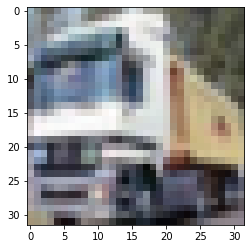

In [4]:
import matplotlib.pyplot as plt
img = plt.imshow(x_train[1])

print('The label is:', y_train[1])

With the label showing as six, we still do not know the class in words representing this image. The below image shows the conversion of numbers to the word class. Change the value of the printed label, and tr to see if you can find similarities according to the class the number value belongs to. 




---

> ![number_to_word_class_cifar10](https://miro.medium.com/max/628/1*E7N3oVdqc-QUwd9_T0i9SQ.png)




## Data Pre-processing
In this step we want to preprocess our data because our labels as class number are not very helpful. We can hot-encode our label so that the model returns 1 for matched class and 0 for the rest unmatched classes(i.e 9). For a simple logistic predictor, we would not need to perform this pre processing step mainly because our classes are just two. Class 0 and class 1.

For example, building a model that predicts if a student is given admission(1) or not given(0) by training on past data X(scores on tests) and y(admission decision). In this case, we have only two possible classes and can continue without the need for data procesing. 

This processing step is called *one-hot encoding*. It involves converting the labels into a set of 10 numbers where each number represents if the image belongs to that class or not. So if an image belongs to the first class, the first number of this set will be a 1 and all other numbers in this set will be a 0. The conversion table would look like:




> ![alt text](https://miro.medium.com/max/1130/1*t-ttNgcua-JtTlLjdRScww.png)

Lets write the code in Keras for that:





In [5]:
import keras
y_train_one_hot = keras.utils.to_categorical(y_train, 10)
y_test_one_hot = keras.utils.to_categorical(y_test, 10)

print('The one hot label is:', y_train_one_hot[1])

The one hot label is: [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In the above code, the line **y_train_one_hot = keras.utils.to_categorical(y_train, 10)** means that we want to take the array conatining the number labels of *y_train* and convert it to one-hot setting *y_train_one_hot*. The numeber 10 is a required paarmeter, it specifies the number of classes there are.

We printed out the label of our second image(index 1/truck/label 9) and got the *one-hot setting* as above.

# Processing images(x)
To process our images , what we do is reduce the pixels values between 0 and 1 which would aid in training our neural network. The pixel values of x ranges between 0 - 255, to reduce them we can divide b 255. We first covert the datatype to *float32* which is a datatype that can store decimal values. Let's write code for this.

In [6]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train = x_train / 255
x_test = x_test / 255

x_train[0]

array([[[0.23137255, 0.24313726, 0.24705882],
        [0.16862746, 0.18039216, 0.1764706 ],
        [0.19607843, 0.1882353 , 0.16862746],
        ...,
        [0.61960787, 0.5176471 , 0.42352942],
        [0.59607846, 0.49019608, 0.4       ],
        [0.5803922 , 0.4862745 , 0.40392157]],

       [[0.0627451 , 0.07843138, 0.07843138],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509805, 0.21568628],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117648, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215687, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941177, 0.19607843],
        [0.47058824, 0.32941177, 0.19607843],
        [0.42745098, 0.28627452, 0.16470589]],

       ...,

       [[0.8156863 , 0.6666667 , 0.3764706 ],
        [0.7882353 , 0.6       , 0.13333334],
        [0.7764706 , 0

Running the code cell above, we can see that the pixel values for *x_train[0]* printed out are now strictly within the ranges of 0 and 1, they are said to have been *normalized*. 

This processing step makes our neural network to train faster and achieve better accuracy.
Note: This processing is also carried out on the test set since when evaluating we want the same range of values as those used when training.



# Building and Training our Convolutional Neural Network
We finally arrive at the most productive step, to train our model. This step just involves setting up a structure or architecture we want our model to have. We would add layers to our model in these sequence:


1.   Add Conv2D layer with zero-padding: This is a layer that would isolate the features in our images so that we can gather more information in less pixels. It actually ends up reducing the size of the pixels. The zero-padding works to produce the same output width and height as that of the input, what this means literally is that; we aren't losing any information by using zero-padding(same). The kind of padding used would either try to highlight the horizontal or vertical aspect(lines) of the image. Padding is also called a filter or kernel

2.   Add MaxPolling layer with stride: This layer basically works to shrink the pixel height and weight while still retaining relevant information. The stride enables the information retention by passing to the output the *largest* number in a box. It is passed across the whole image, the size of the stride determines the quantity or perhaps quality of features that is passed to the output after MaxPooling is carried out.

3.   Relu activation func: We use the relu activation in all layers except for the last layer which is a softmax. Relu (Rectified Linear Unit) is an activation that outputs the value of input X is x > 0.

4.   Softmax:  Our last layer Softmax simply transforms the output of the previous layer into probability distributions. So we are able to match image classification based on the probability given by the model of each classes. And therefore, our model picks the class with the highest probability as the correct object detected.


So now that we have gone through all the important parts of training our model, let's go on to write code for it.

<b>Note:</b> The above explanations are just made briefly and are not guaranteed to make a begineers understand fully their meaning and application. I assume though that users have begineer to intermediate experience with keras and has experimented in small codes with it. 

To get a solid un derstanding of Tensorflow and Keras, I recommend taking the [Tensorflow In Practice Course](https://) by deeplearning.ai on Coursera Platform.



In [7]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D

model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32,32,3)))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
hist = model.fit(x_train, y_train_one_hot, 
           batch_size=32, epochs=20, 
           validation_split=0.2)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 8, 8, 64)         

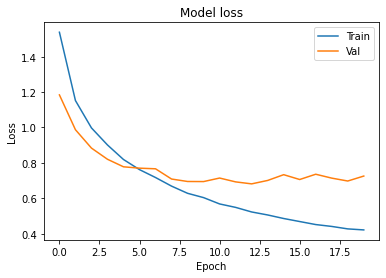

In [8]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

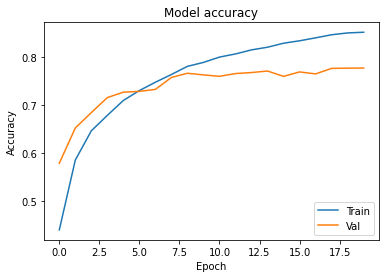

In [10]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [13]:
model.evaluate(x_test, y_test_one_hot)[1]



model.save('chel_cifar10_model_OR.h5')

10000/10000 [==============================] - 1s 88us/step
